### Project 4 Modelling: OLS, Poisson regression, SARIMAX

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from numpy import arange
import calendar
from dateutil.relativedelta import relativedelta

In [2]:
google = pd.read_csv('complete_google_trends.csv')

In [3]:
google.head()

,Unnamed: 0,Week,dengue_search,dengue fever: (Singapore),rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,date,year,month,week
0,3,12/1/14,38,53,73,38,0,26,66,2,25,11,2014-13-01,2014,1,2
1,4,19/1/14,31,60,60,52,12,13,80,0,27,8,2014-20-01,2014,1,3
2,5,26/1/14,23,24,57,39,31,0,64,0,25,12,2014-27-01,2014,1,4
3,6,2/2/14,28,44,56,31,0,7,72,0,22,8,2014-03-02,2014,2,5
4,7,9/2/14,35,45,75,56,0,10,58,0,24,15,2014-10-02,2014,2,6


In [4]:
google.drop(columns = ['Unnamed: 0', 'Week'], inplace = True)

In [5]:
dengue = pd.read_csv('dengue.csv')
changi = pd.read_csv('cleaned_changi_weather.csv')

In [6]:
dengue.head()

,type_dengue,date,year,month,number
0,Dengue,2014-01-06,2014,1,436.0
1,DHF,2014-01-06,2014,1,1.0
2,Dengue,2014-01-13,2014,1,479.0
3,DHF,2014-01-13,2014,1,0.0
4,Dengue,2014-01-20,2014,1,401.0


In [7]:
# dropping DHF from dengue dataset and keeping only relevant columns

dengue = dengue[dengue['type_dengue'] == 'Dengue']
dengue = dengue[['date', 'number']]

In [8]:
dengue.sort_values('date')

,date,number
0,2014-01-06,436.0
2,2014-01-13,479.0
4,2014-01-20,401.0
6,2014-01-27,336.0
8,2014-02-03,234.0
...,...,...
512,2018-11-26,109.0
514,2018-12-03,113.0
516,2018-12-10,107.0
518,2018-12-17,127.0


In [9]:
changi.sort_values('date').head(10)

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),date,week
0,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-01-01,1
1,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-01-02,1
2,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1,2014-01-03,1
3,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9,2014-01-04,1
4,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6,2014-01-05,1
5,2014,1,6,31.2,10.0,10.8,11.6,25.3,27.1,23.9,6.1,25.6,2014-01-06,2
6,2014,1,7,0.0,0.0,0.0,0.0,26.7,30.7,24.3,8.1,33.5,2014-01-07,2
7,2014,1,8,0.0,0.0,0.0,0.0,27.1,31.8,24.7,9.0,34.9,2014-01-08,2
8,2014,1,9,2.0,1.8,2.0,2.0,25.9,29.3,24.3,5.1,25.2,2014-01-09,2
9,2014,1,10,0.0,0.0,0.0,0.0,26.8,30.6,24.2,5.3,19.1,2014-01-10,2


In [10]:
# aligning dates

changi = changi[(changi['date'] >= '2014-01-06') & (changi['date']<= '2018-12-24')]


In [11]:
google.head()

,dengue_search,dengue fever: (Singapore),rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,date,year,month,week
0,38,53,73,38,0,26,66,2,25,11,2014-13-01,2014,1,2
1,31,60,60,52,12,13,80,0,27,8,2014-20-01,2014,1,3
2,23,24,57,39,31,0,64,0,25,12,2014-27-01,2014,1,4
3,28,44,56,31,0,7,72,0,22,8,2014-03-02,2014,2,5
4,35,45,75,56,0,10,58,0,24,15,2014-10-02,2014,2,6


In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dengue_search              260 non-null    int64 
 1   dengue fever: (Singapore)  260 non-null    int64 
 2   rashes_search              260 non-null    int64 
 3   vomiting_search            260 non-null    int64 
 4   eye_pain_search            260 non-null    int64 
 5   joint_pain_search          260 non-null    int64 
 6   fever_search               260 non-null    int64 
 7   wolbachia_search           260 non-null    int64 
 8   headache_search            260 non-null    int64 
 9   nausea_search              260 non-null    int64 
 10  date                       260 non-null    object
 11  year                       260 non-null    int64 
 12  month                      260 non-null    int64 
 13  week                       260 non-null    int64 
dtypes: int64(1

In [13]:
google['date']=pd.to_datetime(google['date'], format='%Y-%d-%m')

In [14]:
google

,dengue_search,dengue fever: (Singapore),rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,date,year,month,week
0,38,53,73,38,0,26,66,2,25,11,2014-01-13,2014,1,2
1,31,60,60,52,12,13,80,0,27,8,2014-01-20,2014,1,3
2,23,24,57,39,31,0,64,0,25,12,2014-01-27,2014,1,4
3,28,44,56,31,0,7,72,0,22,8,2014-02-03,2014,2,5
4,35,45,75,56,0,10,58,0,24,15,2014-02-10,2014,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,22,25,45,58,15,10,68,0,27,9,2018-12-03,2018,12,48
256,18,22,49,59,0,17,61,0,23,13,2018-12-10,2018,12,49
257,19,9,49,69,9,23,75,0,27,15,2018-12-17,2018,12,50
258,18,20,40,74,13,20,81,0,23,12,2018-12-24,2018,12,51


In [15]:
google = google[google['date'] <= '2018-12-24']

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   dengue_search              259 non-null    int64         
 1   dengue fever: (Singapore)  259 non-null    int64         
 2   rashes_search              259 non-null    int64         
 3   vomiting_search            259 non-null    int64         
 4   eye_pain_search            259 non-null    int64         
 5   joint_pain_search          259 non-null    int64         
 6   fever_search               259 non-null    int64         
 7   wolbachia_search           259 non-null    int64         
 8   headache_search            259 non-null    int64         
 9   nausea_search              259 non-null    int64         
 10  date                       259 non-null    datetime64[ns]
 11  year                       259 non-null    int64         
 12  month   

In [17]:
google = google[['dengue_search', 'dengue fever: (Singapore)', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'wolbachia_search', 'headache_search', 'nausea_search',
       'date']]

In [18]:
changi.columns

Index(['Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'date', 'week'],
      dtype='object')

In [19]:
# grouping weather data by week

changi.index = pd.to_datetime(changi['date'])
changi = changi.resample('W-Mon').mean()


/var/folders/fw/16cq5dl511vfznvgg8qgg0bm0000gn/T/ipykernel_16234/668719752.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  changi = changi.resample('W-Mon').mean()


In [20]:
changi = changi.reset_index()

In [21]:

changi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           260 non-null    datetime64[ns]
 1   Year                           260 non-null    float64       
 2   Month                          260 non-null    float64       
 3   Day                            260 non-null    float64       
 4   Daily Rainfall Total (mm)      260 non-null    float64       
 5   Highest 30 Min Rainfall (mm)   260 non-null    float64       
 6   Highest 60 Min Rainfall (mm)   260 non-null    float64       
 7   Highest 120 Min Rainfall (mm)  260 non-null    float64       
 8   Mean Temperature (°C)          260 non-null    float64       
 9   Maximum Temperature (°C)       260 non-null    float64       
 10  Minimum Temperature (°C)       260 non-null    float64       
 11  Mean Wind Speed (km

In [22]:
dengue['date'] = pd.to_datetime(dengue['date'])
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 520
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    261 non-null    datetime64[ns]
 1   number  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [23]:
changi_dengue = changi.merge(dengue, on = 'date')
changi_dengue = changi_dengue[['date', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'number']]


In [24]:
changi_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           261 non-null    datetime64[ns]
 1   Daily Rainfall Total (mm)      261 non-null    float64       
 2   Highest 30 Min Rainfall (mm)   261 non-null    float64       
 3   Highest 60 Min Rainfall (mm)   261 non-null    float64       
 4   Highest 120 Min Rainfall (mm)  261 non-null    float64       
 5   Mean Temperature (°C)          261 non-null    float64       
 6   Maximum Temperature (°C)       261 non-null    float64       
 7   Minimum Temperature (°C)       261 non-null    float64       
 8   Mean Wind Speed (km/h)         261 non-null    float64       
 9   Max Wind Speed (km/h)          261 non-null    float64       
 10  number                         261 non-null    float64       
dtypes: datetime64[ns](1

In [25]:
# combining with google trends data

combined = changi_dengue.merge(google, on = 'date')
combined.head()

,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),...,dengue_search,dengue fever: (Singapore),rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search
0,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,31.742857,...,38,53,73,38,0,26,66,2,25,11
1,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,37.085714,...,31,60,60,52,12,13,80,0,27,8
2,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,36.257143,...,23,24,57,39,31,0,64,0,25,12
3,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,37.628571,...,28,44,56,31,0,7,72,0,22,8
4,2014-02-10,0.028571,0.028571,0.028571,0.028571,26.814286,31.857143,23.871429,11.585714,30.014286,...,35,45,75,56,0,10,58,0,24,15


In [26]:
df = combined

In [27]:
df = df.set_index('date')

## Quick EDA

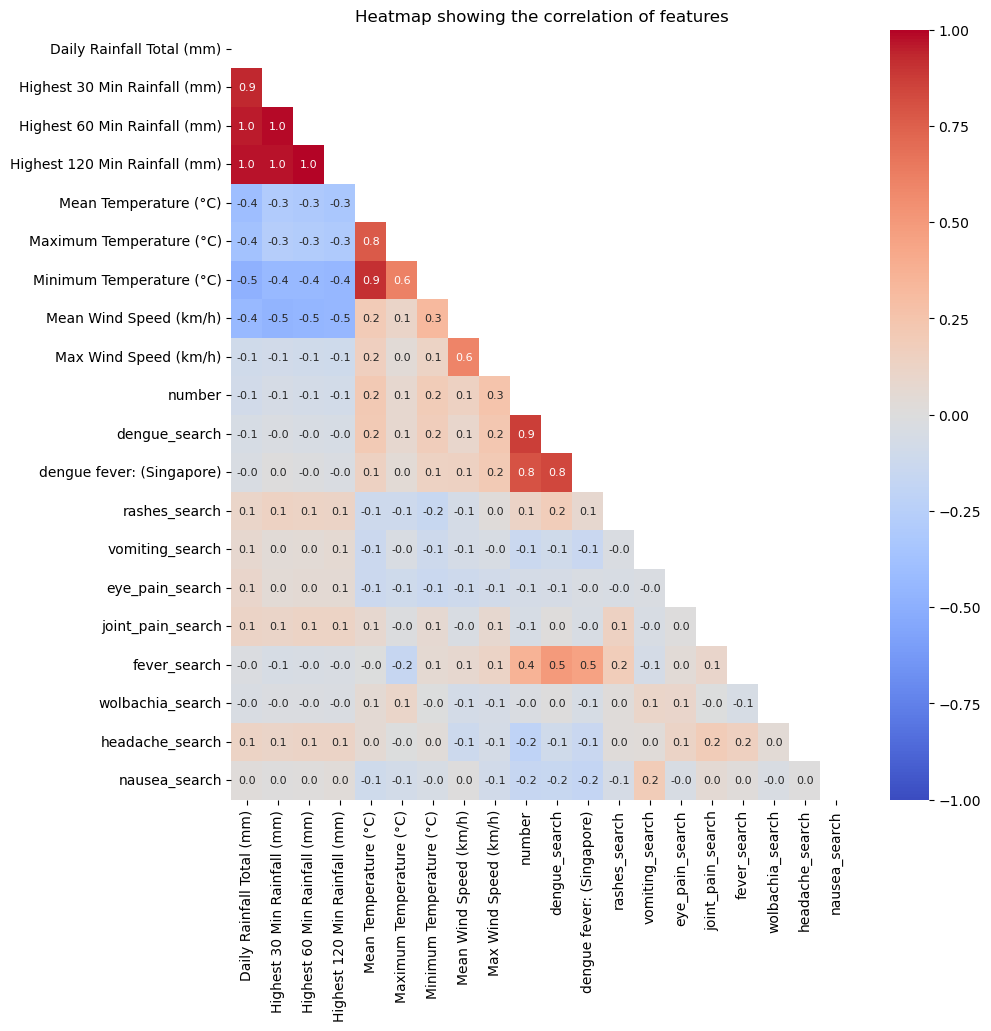

In [28]:
# plot a heatmap to look at the correlation matrix of the selected variables
# getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
plt.figure(figsize=(10,10))
plt.title("Heatmap showing the correlation of features")
sns.heatmap(df.corr(), annot=True, mask= matrix, cmap="coolwarm", 
           fmt=".1f", annot_kws={"size":8}, vmin=-1, vmax=1);

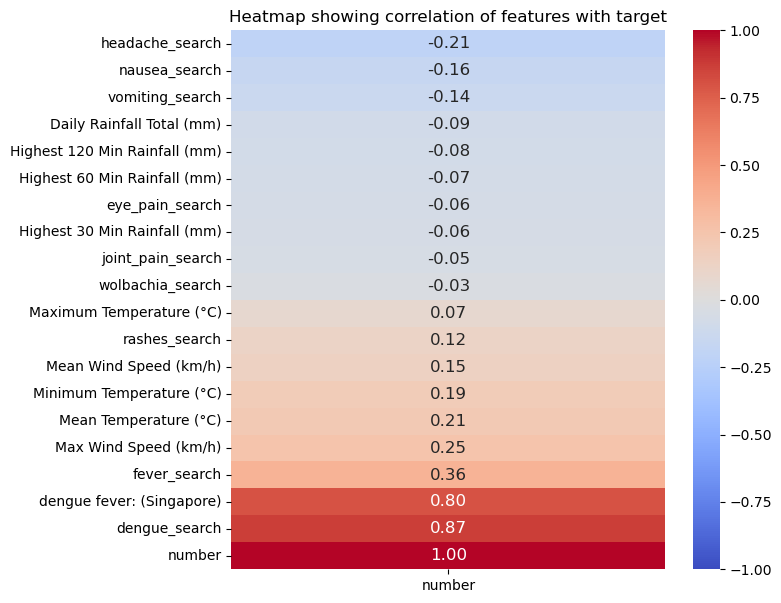

In [29]:
plt.figure(figsize=(7,7))
plt.title("Heatmap showing correlation of features with target")
sns.heatmap(df.corr()[["number"]].sort_values(by = 'number'), annot=True, cmap="coolwarm", 
           fmt=".2f", annot_kws={"size":12}, vmin=-1, vmax=1);

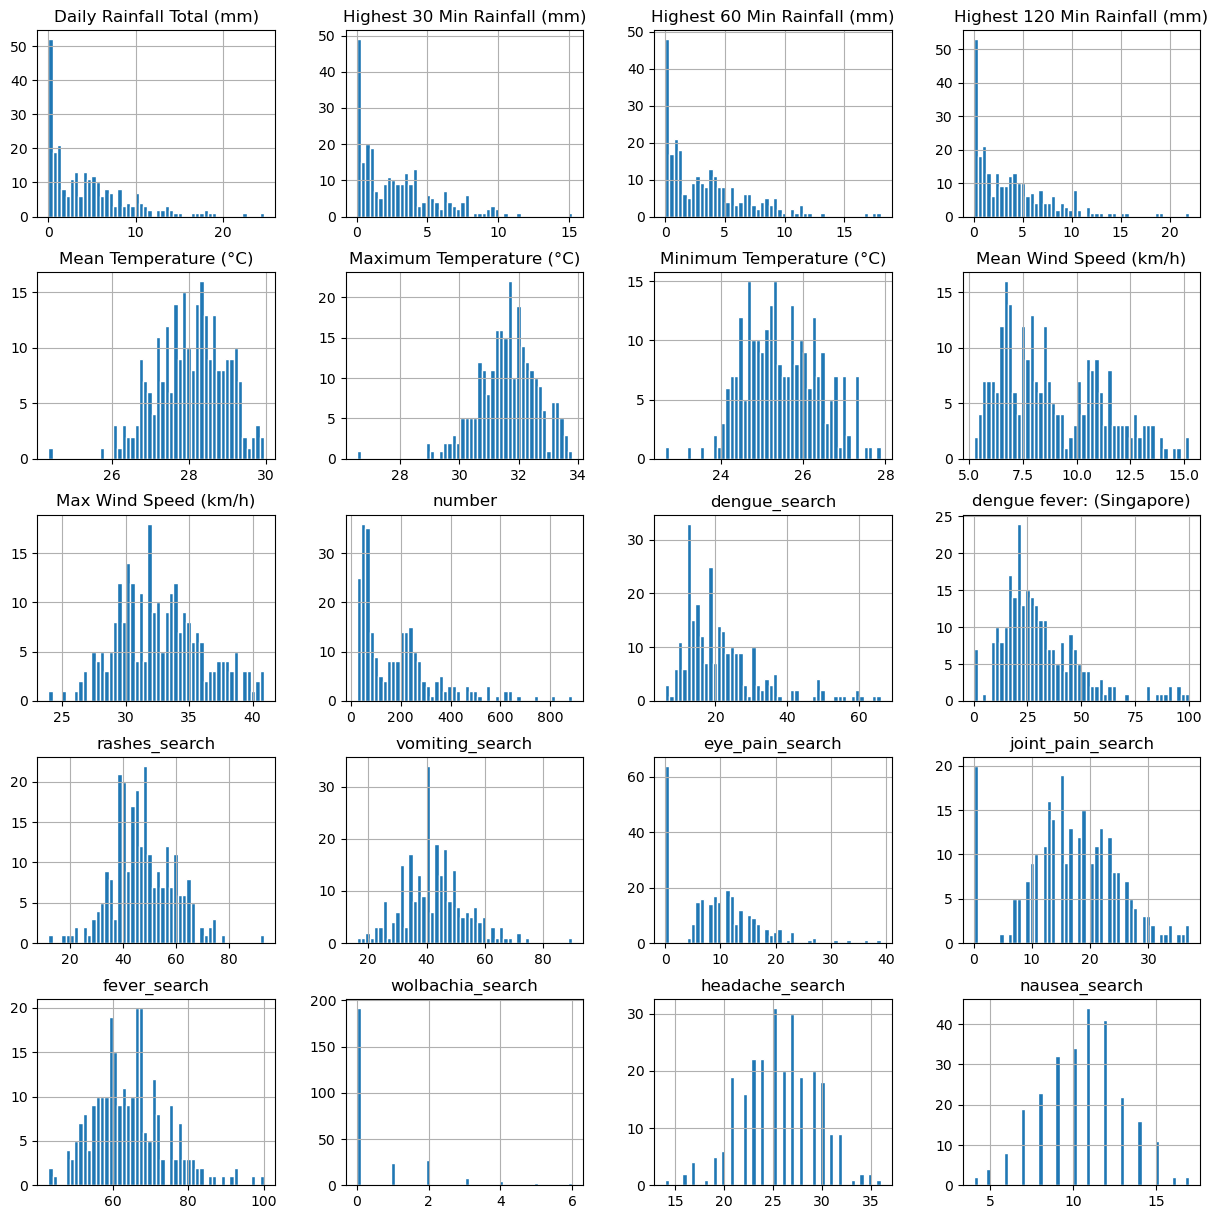

In [30]:
#visualizing distributions 
df.hist(bins=50, figsize=(15,15), ec='w')
plt.show()
#target-area-is heavily skewed, we have extreme outliers.

In [31]:
df.columns

Index(['Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)',
       'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'number', 'dengue_search',
       'dengue fever: (Singapore)', 'rashes_search', 'vomiting_search',
       'eye_pain_search', 'joint_pain_search', 'fever_search',
       'wolbachia_search', 'headache_search', 'nausea_search'],
      dtype='object')

In [32]:
df = df.reset_index()

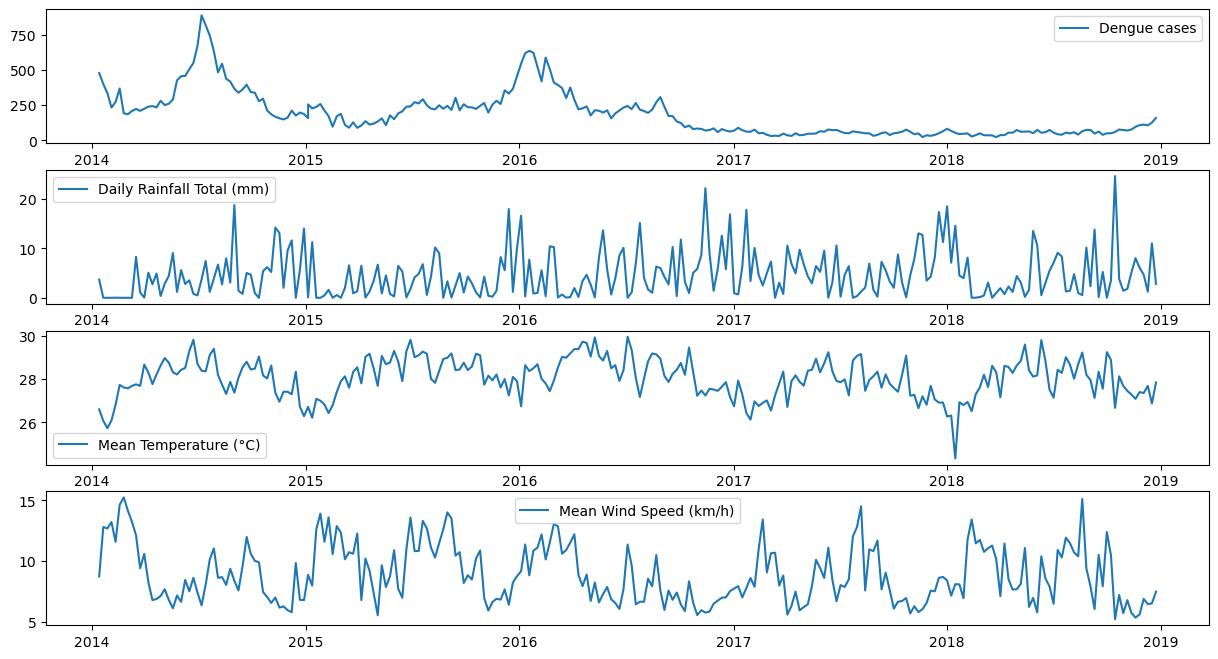

In [33]:
# Looking at chaneges over time for weather variables

fig, ax = plt.subplots(nrows=4, figsize=(15,8))

ax[0].plot(df['date'], df['number'], label='Dengue cases')
ax[1].plot(df['date'], df['Daily Rainfall Total (mm)'], label='Daily Rainfall Total (mm)')   
ax[2].plot(df['date'], df['Mean Temperature (°C)'], label='Mean Temperature (°C)')
ax[3].plot(df['date'], df['Mean Wind Speed (km/h)'], label='Mean Wind Speed (km/h)')

# Cosmetics & show
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

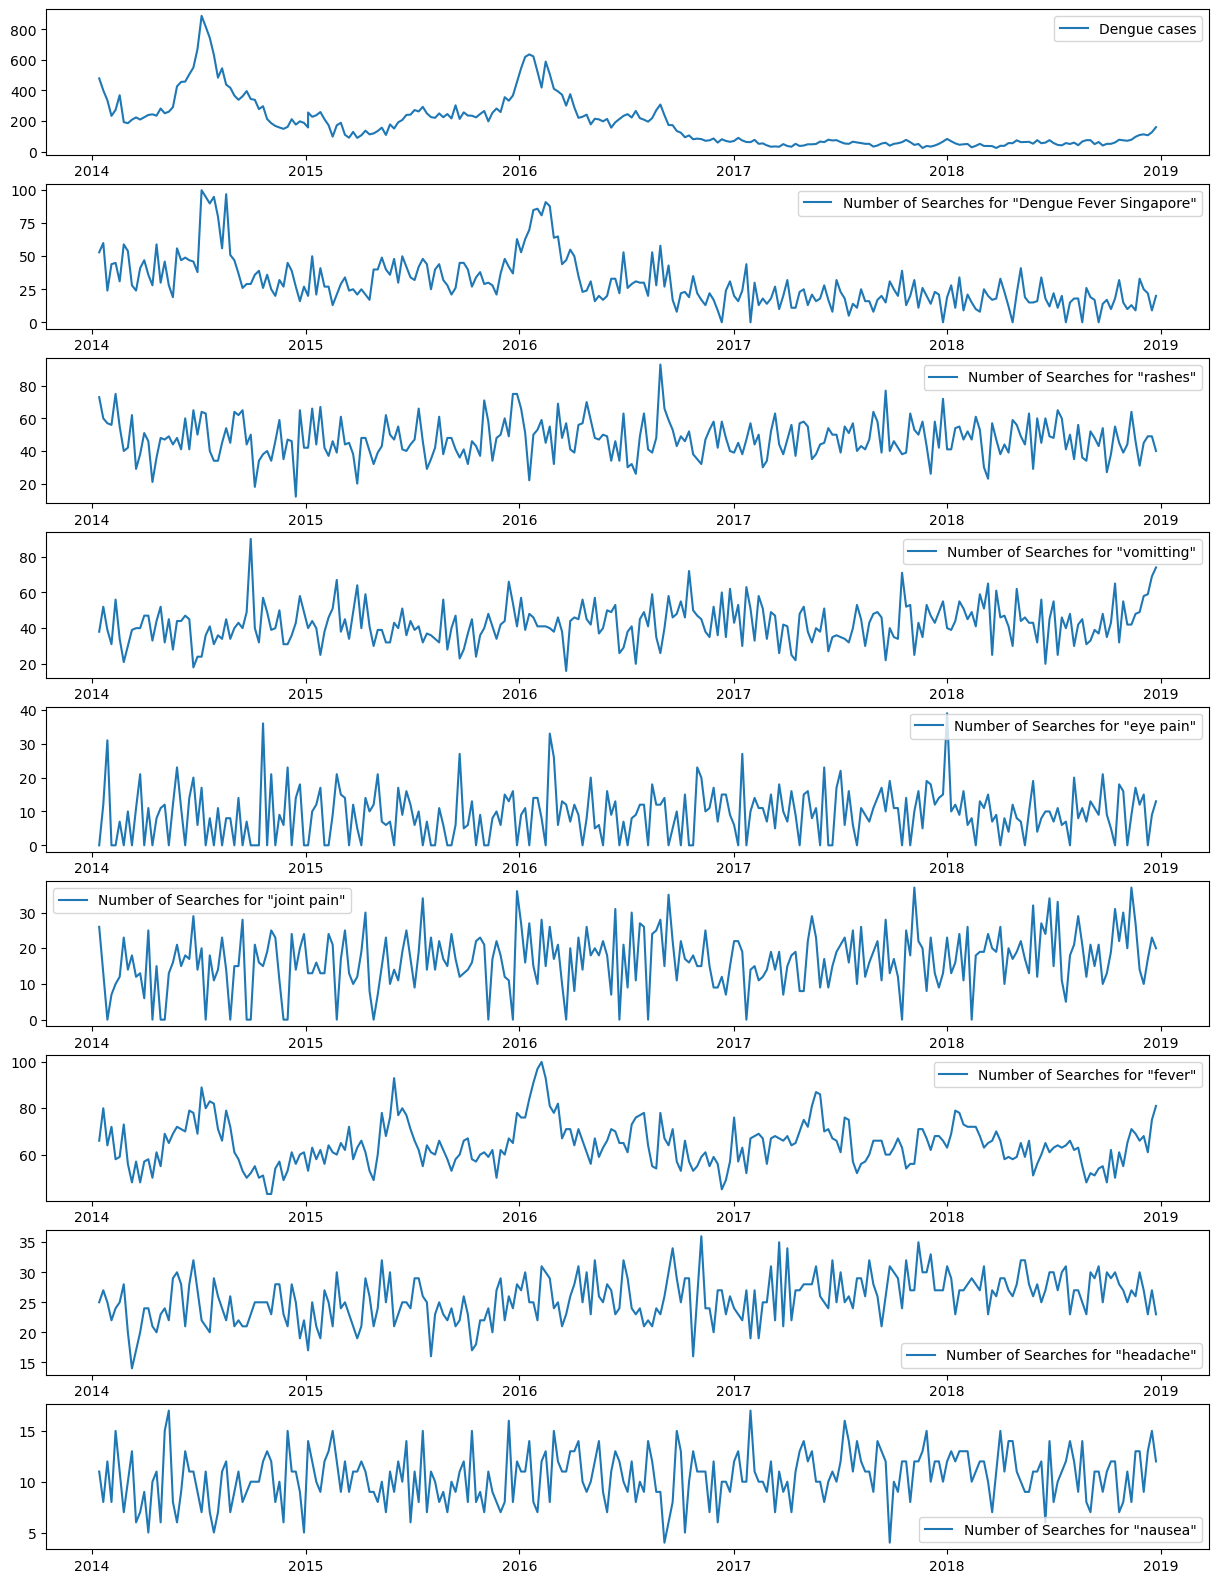

In [34]:
# Looking at changes over time for search-related variables

fig, ax = plt.subplots(nrows=9, figsize=(15,20))

ax[0].plot(df['date'], df['number'], label='Dengue cases')
ax[1].plot(df['date'], df['dengue fever: (Singapore)'], label='Number of Searches for "Dengue Fever Singapore"')   
ax[2].plot(df['date'], df['rashes_search'], label='Number of Searches for "rashes"')
ax[3].plot(df['date'], df['vomiting_search'], label='Number of Searches for "vomitting"')
ax[4].plot(df['date'], df['eye_pain_search'], label='Number of Searches for "eye pain"')
ax[5].plot(df['date'], df['joint_pain_search'], label='Number of Searches for "joint pain"')
ax[6].plot(df['date'], df['fever_search'], label='Number of Searches for "fever"')
ax[7].plot(df['date'], df['headache_search'], label='Number of Searches for "headache"')
ax[8].plot(df['date'], df['nausea_search'], label='Number of Searches for "nausea"')

# Cosmetics & show
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()

plt.show()

In [35]:
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           260 non-null    datetime64[ns]
 1   Daily Rainfall Total (mm)      260 non-null    float64       
 2   Highest 30 Min Rainfall (mm)   260 non-null    float64       
 3   Highest 60 Min Rainfall (mm)   260 non-null    float64       
 4   Highest 120 Min Rainfall (mm)  260 non-null    float64       
 5   Mean Temperature (°C)          260 non-null    float64       
 6   Maximum Temperature (°C)       260 non-null    float64       
 7   Minimum Temperature (°C)       260 non-null    float64       
 8   Mean Wind Speed (km/h)         260 non-null    float64       
 9   Max Wind Speed (km/h)          260 non-null    float64       
 10  number                         260 non-null    float64       
 11  dengue_search      

In [36]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [37]:
# grouping case number by year and month

grouped_df = df.groupby(['year', 'month'])['number'].agg('mean')
grouped_df = pd.DataFrame(grouped_df)

In [38]:
# grouping temp by year and month

grouped_temp = df.groupby(['year', 'month'])['Mean Temperature (°C)'].agg('mean')
grouped_temp = pd.DataFrame(grouped_temp)

In [39]:
# grouping dengue fever search by year and month

grouped_dengue_fever = df.groupby(['year', 'month'])['dengue fever: (Singapore)'].agg('mean')
grouped_dengue_fever = pd.DataFrame(grouped_dengue_fever)

In [40]:
# generate a list of shortened month names
short_month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# print the list
print(short_month_names)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


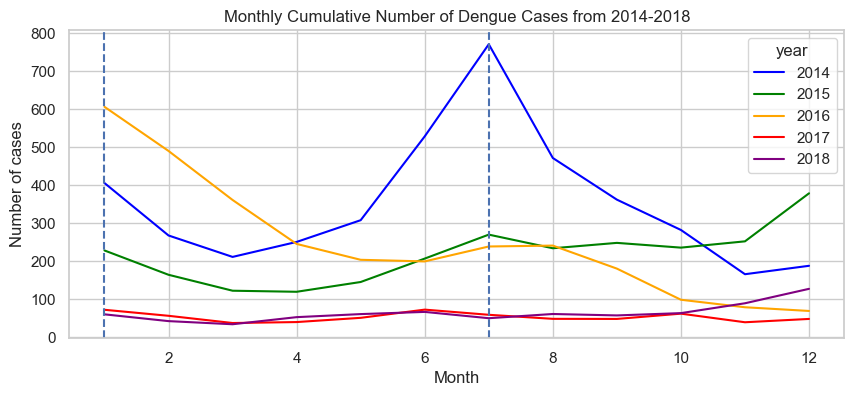

In [96]:
# Cumulative case number by year

plt.figure(figsize=(10, 4))
sns.lineplot(data=grouped_df, x="month", y="number", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Cumulative Number of Dengue Cases from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Number of cases") 

plt.show()

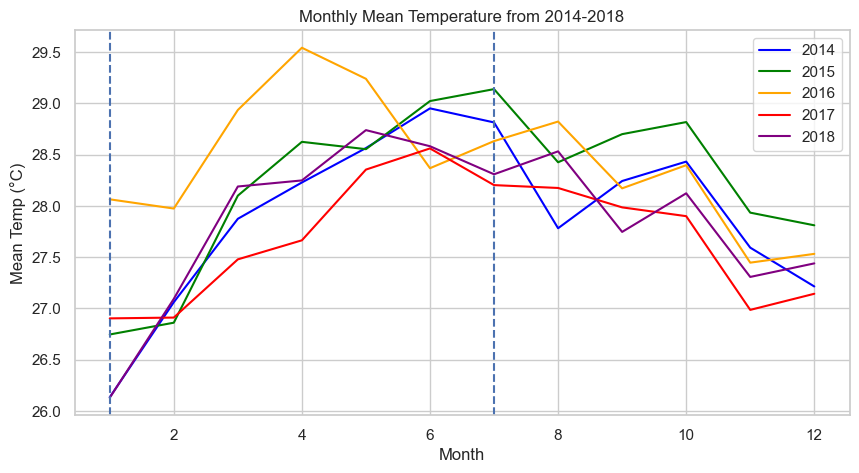

In [97]:
# Mean temp by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_temp, x="month", y="Mean Temperature (°C)", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Monthly Mean Temperature from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Mean Temp (°C)") 
plt.legend(loc='upper right')

plt.show()

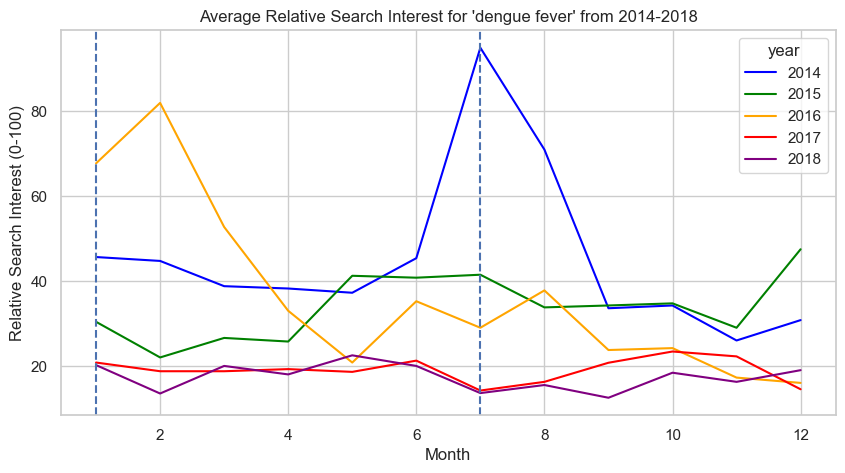

In [100]:
# Average 'dengue fever' searches by year

plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_dengue_fever, x="month", y="dengue fever: (Singapore)", hue="year", palette=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Average Relative Search Interest for 'dengue fever' from 2014-2018")
plt.axvline(x = 7, linestyle = "--") 
plt.axvline(x = 1, linestyle = "--") 
plt.xlabel("Month")
plt.ylabel("Relative Search Interest (0-100)") 

plt.show()

In [44]:
# Checking linearity of relationship

#sns.pairplot(df)

In [45]:
time_df = df[['year', 'month', 'number']]
time_df.head()

,year,month,number
0,2014,1,479.0
1,2014,1,401.0
2,2014,1,336.0
3,2014,2,234.0
4,2014,2,273.0


In [46]:
grouped_time_df = pd.DataFrame.pivot_table(time_df, values='number', index='year',
                                           columns='month', aggfunc=np.mean)
grouped_time_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,405.333333,267.25,210.80,250.25,307.50,528.2,770.75,471.25,361.60,281.75,165.25,187.40
2015,227.800000,163.75,121.80,119.00,144.75,206.4,269.50,233.60,247.75,235.25,251.80,378.25
2016,606.000000,489.80,360.75,245.00,203.20,199.0,238.25,240.60,180.00,98.00,78.25,68.50
2017,71.600000,55.75,36.75,39.25,50.40,72.0,58.40,47.75,47.50,61.40,38.75,47.50
2018,59.600000,41.75,33.50,52.20,60.25,66.0,49.40,60.50,56.75,62.80,88.75,126.75


Text(0.5, 1.0, 'Comparison of Mean Dengue Cases by Month (2014-2018)')

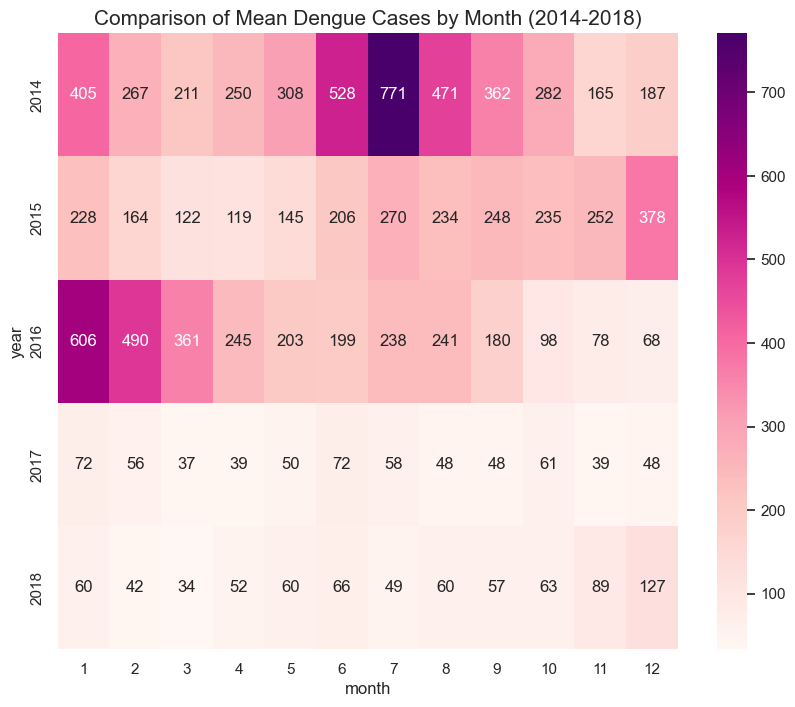

In [47]:
# Looking at cases over years and months

fig, ax = plt.subplots(figsize=(10,8))  

sns.heatmap(grouped_time_df,
            annot=True,
            fmt='.0f',
            cmap="RdPu")

ax.set_title('Comparison of Mean Dengue Cases by Month (2014-2018)', fontsize =15)


## Feature Engineering

In [48]:
df = df.reset_index()
df.head()

,index,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),...,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,year,month
0,0,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,...,73,38,0,26,66,2,25,11,2014,1
1,1,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,...,60,52,12,13,80,0,27,8,2014,1
2,2,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,...,57,39,31,0,64,0,25,12,2014,1
3,3,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,...,56,31,0,7,72,0,22,8,2014,2
4,4,2014-02-10,0.028571,0.028571,0.028571,0.028571,26.814286,31.857143,23.871429,11.585714,...,75,56,0,10,58,0,24,15,2014,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          260 non-null    int64         
 1   date                           260 non-null    datetime64[ns]
 2   Daily Rainfall Total (mm)      260 non-null    float64       
 3   Highest 30 Min Rainfall (mm)   260 non-null    float64       
 4   Highest 60 Min Rainfall (mm)   260 non-null    float64       
 5   Highest 120 Min Rainfall (mm)  260 non-null    float64       
 6   Mean Temperature (°C)          260 non-null    float64       
 7   Maximum Temperature (°C)       260 non-null    float64       
 8   Minimum Temperature (°C)       260 non-null    float64       
 9   Mean Wind Speed (km/h)         260 non-null    float64       
 10  Max Wind Speed (km/h)          260 non-null    float64       
 11  number             

In [50]:
df.head()

,index,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),...,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,year,month
0,0,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,...,73,38,0,26,66,2,25,11,2014,1
1,1,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,...,60,52,12,13,80,0,27,8,2014,1
2,2,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,...,57,39,31,0,64,0,25,12,2014,1
3,3,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,...,56,31,0,7,72,0,22,8,2014,2
4,4,2014-02-10,0.028571,0.028571,0.028571,0.028571,26.814286,31.857143,23.871429,11.585714,...,75,56,0,10,58,0,24,15,2014,2


In [51]:
# creating month and year columns

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [52]:
# log transformation  

df['number_log'] = np.log(df['number'])

In [53]:
df.columns

Index(['index', 'date', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)',
       'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
       'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', 'number',
       'dengue_search', 'dengue fever: (Singapore)', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'wolbachia_search', 'headache_search', 'nausea_search',
       'year', 'month', 'number_log'],
      dtype='object')

In [54]:
# Since one of OLS' assumptions is no multicollinearity, we will perform the following feature selection:
#- For rainfall, take "Daily Rainfall Total (mm)" and drop the rest
#- For temperature, take "Mean Temperature (°C)" and drop the rest
#- For wind, take "Mean Wind Speed (km/h")
# - Taking dengue fever and dropping dengue 
# - Additionally, dropping 'Wolbachia' due to sparse data

df = df[['Daily Rainfall Total (mm)',
          'Mean Temperature (°C)', 
          'Mean Wind Speed (km/h)',
          'dengue fever: (Singapore)', 'rashes_search', 'vomiting_search',
          'eye_pain_search', 'joint_pain_search', 'fever_search',
          'headache_search', 'nausea_search', 'year', 'month',
          'number_log']]


## Modeling

### 1. Simple OLS

In [55]:
#one-hot encode year and month

df = pd.get_dummies(df,
                    columns=['year', 'month'],
                    drop_first=True)

In [56]:
y = df['number_log']
X = df.drop(columns = 'number_log')

In [57]:
X.columns

Index(['Daily Rainfall Total (mm)', 'Mean Temperature (°C)',
       'Mean Wind Speed (km/h)', 'dengue fever: (Singapore)', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'headache_search', 'nausea_search', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

### Train test split and modeling

In [58]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.75,
    random_state=42
)

In [59]:
# Scale our data.
# Relabeling scaled data as "Z" is common.

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [60]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (65, 26)
y_train shape is: (65,)
Z_test shape is: (195, 26)
y_test shape is: (195,)


In [61]:
# Step 1. Instantiate the model.
lr = LinearRegression()

# Step 2. Fit the model on the training data.
lr.fit(Z_train, y_train)

# Step 3. Generate predictions.
preds = lr.predict(Z_test)

In [62]:
# Check the MSE on the training and testing sets.

print(f'MSE on testing set: {mean_squared_error(y_train, lr.predict(Z_train))}')
print(f'MSE on training set: {mean_squared_error(y_test, preds)}')

MSE on testing set: 0.053475454889078664
MSE on training set: 0.21847892486052523


In [63]:
# Cross-validation

lr_scores = cross_val_score(lr, Z_train, y_train, cv=5)
print('Cross-validation scores:', lr_scores)
print('Mean score:', lr_scores.mean())

Cross-validation scores: [0.73185308 0.68942224 0.71134168 0.66989193 0.82762135]
Mean score: 0.7260260545568398


Some overfitting is observed

In [64]:
# Check the R^2 on the training and testing sets 

print(f'R^2 on testing set: {r2_score(y_train, lr.predict(Z_train))}')
print(f'R^2 on training set: {r2_score(y_test, preds)}')

R^2 on testing set: 0.9280426543216966
R^2 on training set: 0.6999441248039411


In [65]:
pd.DataFrame({
    'features' : X.columns,
    'coefficients' : lr.coef_,
    'converted_coefficients': (np.exp(lr.coef_)-1)*100,
})

,features,coefficients,converted_coefficients
0,Daily Rainfall Total (mm),-0.075819,-7.301617
1,Mean Temperature (°C),0.104639,11.030947
2,Mean Wind Speed (km/h),-0.115028,-10.865909
3,dengue fever: (Singapore),0.250917,28.520338
4,rashes_search,0.015470,1.559019
5,vomiting_search,0.106350,11.221080
6,eye_pain_search,-0.052110,-5.077509
7,joint_pain_search,-0.004234,-0.422555
8,fever_search,-0.032625,-3.209894
9,headache_search,0.041395,4.226339


In [66]:
# observing coefficients' p-values using statsmodels

X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()


In [67]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             number_log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     57.67
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.39e-86
Time:                        21:09:32   Log-Likelihood:                -67.918
No. Observations:                 260   AIC:                             189.8
Df Residuals:                     233   BIC:                             286.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9223      1.235     -0.747      0.456      -3.355       1.510
Daily Rainfall Total (mm)     0.0019      0.006      0.327      0.744      -0.010       0.013
Mean Temperature (°C)         0.2182      0.046      4.702      0.000       0.127       0.310
Mean Wind Speed (km/h)       -0.0168      0.015     -1.126      0.261      -0.046       0.013
dengue fever: (Singapore)     0.0106      0.002      5.994      0.000       0.007       0.014
rashes_search                 0.0030      0.002      1.571      0.117      -0.001       0.007
vomiting_search               0.0004      0.002      0.172      0.864      -0.004       0.004
eye_pain_search               0.0011      0.003      0.372      0.710      -0.005       0.007
joint_pain_search             0.0021      0.003      0.740      0.460      -0.003       0.008
fever_search                  0.0092      0.003      2.974      0.003       0.003       0.015
headache_search              -0.0054      0.006     -0.838      0.403      -0.018       0.007
nausea_search                 0.0086      0.009      0.969      0.334      -0.009       0.026
year_2015                    -0.3874      0.070     -5.537      0.000      -0.525      -0.250
year_2016                    -0.5235      0.081     -6.433      0.000      -0.684      -0.363
year_2017                    -1.5514      0.087    -17.792      0.000      -1.723      -1.380
year_2018                    -1.3979      0.088    -15.952      0.000      -1.571      -1.225
month_2                      -0.3167      0.108     -2.931      0.004      -0.530      -0.104
month_3                      -0.7286      0.112     -6.495      0.000      -0.950      -0.508
month_4                      -0.7050      0.135     -5.231      0.000      -0.971      -0.439
month_5                      -0.7108      0.146     -4.868      0.000      -0.998      -0.423
month_6                      -0.5260      0.140     -3.748      0.000      -0.803      -0.249
month_7                      -0.4577      0.127     -3.592      0.000      -0.709      -0.207
month_8                      -0.4299      0.120     -3.583      0.000      -0.666      -0.194
month_9                      -0.3849      0.126     -3.066      0.002      -0.632      -0.138
month_10                     -0.5347      0.133     -4.035      0.000      -0.796      -0.274
month_11                     -0.5152      0.128     -4.014      0.000      -0.768      -0.262
month_12                     -0.4050      0.120     -3.372      0.001      -0.642      -0.168
==============================================================================
Omnibus:                        4.662   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.556
Skew:                     

Text(0.5, 1.0, 'OLS Regression Predictions vs Actual Dengue Cases')

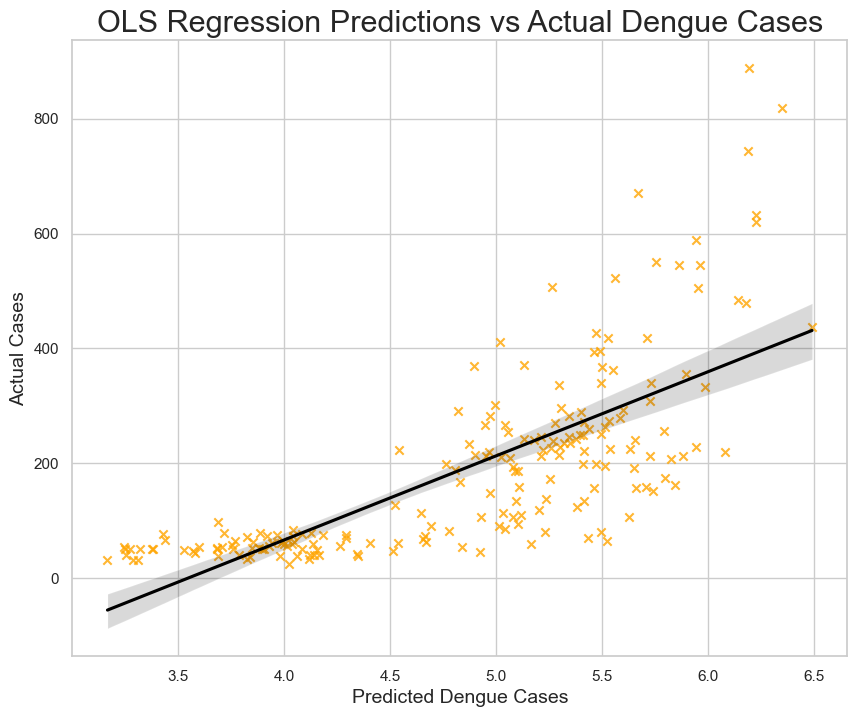

In [68]:
# Create scatterplot to show predicted values versus actual values (not logged)

plt.figure(figsize=(10,8))
sns.regplot(data=Z_train, x=preds, y=np.exp(y_test), 
            marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Dengue Cases', fontsize=14)
plt.ylabel('Actual Cases', fontsize=14)
plt.title('OLS Regression Predictions vs Actual Dengue Cases', fontsize=22)

### Conclusions from OLS

- A linear regression model is probably not the best one to use for predicting dengue cases looking at the residual plot and the cross-validation scores (there is some overfitting)
- Rainfall and wind speed are not significant predictors of dengue cases

**Interpretations for coefficients with p-value < 0.05:**
- For every one-unit increase in the mean temperature, number of dengue cases increases by 8%.
- For every one-unit increase in the searches for 'dengue fever', number of dengue cases increases by 34% 
- Compared to all other months, Jan is associated with higher number of cases 
- 2014 is also associated with more cases than 2015-2018.  

For reference on interpreting log-transformed variables: 
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

### Checking other assumptions

Independence and linearity were checked during EDA.

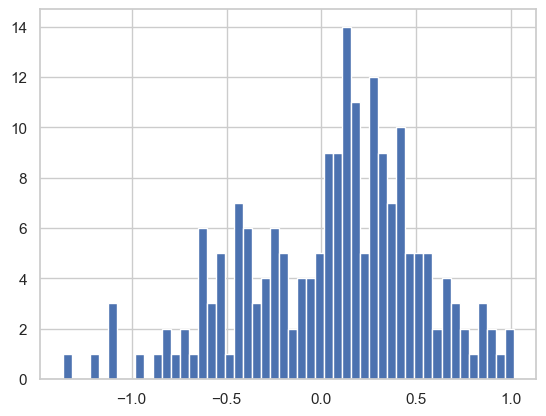

In [69]:
### Normality of error terms

resids = y_test - preds
plt.hist(resids, bins=50);

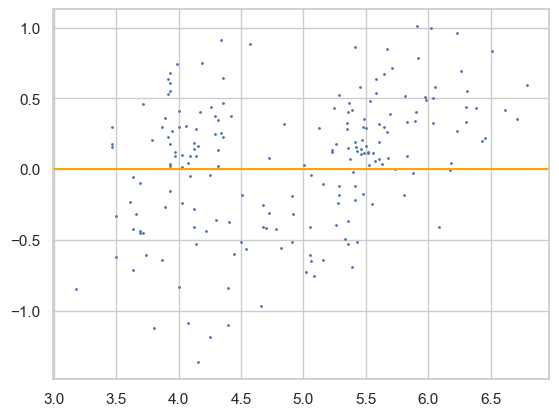

In [70]:
###  Homoscedasticity 
plt.scatter(y_test, resids, s=1)
plt.axhline(0, color="orange");

### 2. Poisson Regression
Without any log transformation

In [71]:
# Set up X.
X_p = sm.add_constant(X)

# Set up y.
y = combined['number']

In [72]:
# Checking if the predicts are correct

X_p.columns

Index(['const', 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)',
       'Mean Wind Speed (km/h)', 'dengue fever: (Singapore)', 'rashes_search',
       'vomiting_search', 'eye_pain_search', 'joint_pain_search',
       'fever_search', 'headache_search', 'nausea_search', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

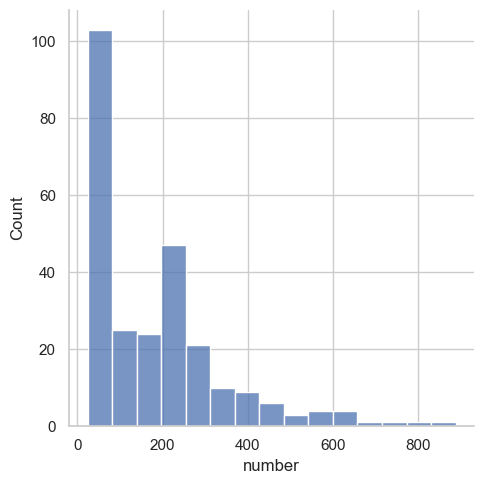

In [73]:
# For y variables that are heavy on the left, Poisson and Gamma regressions are good

sns.displot(y)

In [74]:
# Fit Poisson regression model

glm_poi = sm.GLM(
    y,X_p,
    family=sm.families.Poisson(link = sm.families.links.log())
).fit()


In [75]:
glm_poi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 number   No. Observations:                  260
Model:                            GLM   Df Residuals:                      233
Model Family:                 Poisson   Df Model:                           26
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.7
Date:                Tue, 18 Apr 2023   Deviance:                       3776.2
Time:                        21:09:33   Pearson chi2:                 3.77e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.3343      0.270     -4.949      0.000      -1.863      -0.806
Daily Rainfall Total (mm)     0.0039      0.001      2.887      0.004       0.001       0.007
Mean Temperature (°C)         0.2341      0.010     22.849      0.000       0.214       0.254
Mean Wind Speed (km/h)       -0.0159      0.003     -4.734      0.000      -0.023      -0.009
dengue fever: (Singapore)     0.0097      0.000     24.865      0.000       0.009       0.010
rashes_search                 0.0039      0.000     10.029      0.000       0.003       0.005
vomiting_search            5.579e-05      0.000      0.118      0.906      -0.001       0.001
eye_pain_search               0.0011      0.001      1.736      0.083      -0.000       0.002
joint_pain_search             0.0006      0.001      0.933      0.351      -0.001       0.002
fever_search                  0.0087      0.001     11.714      0.000       0.007       0.010
headache_search              -0.0009      0.001     -0.649      0.516      -0.004       0.002
nausea_search                 0.0081      0.002      4.216      0.000       0.004       0.012
year_2015                    -0.3881      0.014    -28.267      0.000      -0.415      -0.361
year_2016                    -0.4660      0.016    -28.346      0.000      -0.498      -0.434
year_2017                    -1.5856      0.024    -64.863      0.000      -1.633      -1.538
year_2018                    -1.4019      0.023    -60.066      0.000      -1.448      -1.356
month_2                      -0.3465      0.021    -16.131      0.000      -0.389      -0.304
month_3                      -0.6746      0.025    -27.084      0.000      -0.723      -0.626
month_4                      -0.7880      0.032    -24.677      0.000      -0.851      -0.725
month_5                      -0.8290      0.033    -24.842      0.000      -0.894      -0.764
month_6                      -0.6168      0.031    -19.858      0.000      -0.678      -0.556
month_7                      -0.5316      0.027    -19.521      0.000      -0.585      -0.478
month_8                      -0.5178      0.025    -20.939      0.000      -0.566      -0.469
month_9                      -0.4420      0.028    -15.679      0.000      -0.497      -0.387
month_10                     -0.6504      0.031    -20.842      0.000      -0.712      -0.589
month_11                     -0.5924      0.032    -18.550      0.000      -0.655      -0.530
month_12                     -0.4785      0.028    -17.108      0.000      -0.533      -0.424
=============================================================================================
"""

In [76]:
# Table for coefficient interpreting

results = pd.DataFrame({
    'coefficients': glm_poi.params,
    'converted_coefficients': np.exp(glm_poi.params),
    'p_values': round(glm_poi.pvalues,5)
})

In [77]:
results[results['p_values']< 0.05]

,coefficients,converted_coefficients,p_values
const,-1.334312,0.263339,0.00000
Daily Rainfall Total (mm),0.003939,1.003947,0.00389
Mean Temperature (°C),0.234137,1.263818,0.00000
Mean Wind Speed (km/h),-0.015919,0.984207,0.00000
dengue fever: (Singapore),0.009717,1.009765,0.00000
rashes_search,0.003877,1.003885,0.00000
fever_search,0.008674,1.008712,0.00000
nausea_search,0.008110,1.008143,0.00002
year_2015,-0.388121,0.678331,0.00000
year_2016,-0.465997,0.627509,0.00000


Conclusions from Poisson regression (directionality of results is mostly consistent with OLS):
- Consistent with OLS, rainfall is not a significant predictor of dengue cases
- All else held equal, for a one-unit increase in temperature, we can expect 1.2 times as many dengue cases. For a one unit increase in wind speed, there are 2% fewer cases. 
- More Google Search terms were statistically significant compared to OLS: dengue fever, rashes, fever, nausea. For a one-unit increase in 'Dengue Fever' searches, there were 1.1 times as many dengue cases.
- Similar to OLS, there were fewer cases for all years compared to 2014, holding all else constant. 
- Jan is associated with the highest number of cases, followed by Feb and Sep

### SARIMAX

In [78]:
combined.head()

,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),...,dengue_search,dengue fever: (Singapore),rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search
0,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,31.742857,...,38,53,73,38,0,26,66,2,25,11
1,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,37.085714,...,31,60,60,52,12,13,80,0,27,8
2,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,36.257143,...,23,24,57,39,31,0,64,0,25,12
3,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,37.628571,...,28,44,56,31,0,7,72,0,22,8
4,2014-02-10,0.028571,0.028571,0.028571,0.028571,26.814286,31.857143,23.871429,11.585714,30.014286,...,35,45,75,56,0,10,58,0,24,15


In [79]:
combined.columns

Index(['date', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)',
       'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)',
       'Mean Temperature (°C)', 'Maximum Temperature (°C)',
       'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'number', 'dengue_search',
       'dengue fever: (Singapore)', 'rashes_search', 'vomiting_search',
       'eye_pain_search', 'joint_pain_search', 'fever_search',
       'wolbachia_search', 'headache_search', 'nausea_search'],
      dtype='object')

In [80]:
# Created lagged-1 column

combined['mean_temp_lag_1'] = combined['Mean Temperature (°C)'].shift(1)

combined['dengue_fever_lag_1'] = combined['dengue fever: (Singapore)'].shift(1)

combined.head()

,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),...,rashes_search,vomiting_search,eye_pain_search,joint_pain_search,fever_search,wolbachia_search,headache_search,nausea_search,mean_temp_lag_1,dengue_fever_lag_1
0,2014-01-13,3.685714,3.628571,3.685714,3.685714,26.600000,30.428571,24.342857,8.728571,31.742857,...,73,38,0,26,66,2,25,11,NaN,NaN
1,2014-01-20,0.000000,0.000000,0.000000,0.000000,26.071429,28.971429,24.057143,12.800000,37.085714,...,60,52,12,13,80,0,27,8,26.600000,53.0
2,2014-01-27,0.000000,0.000000,0.000000,0.000000,25.728571,29.142857,23.557143,12.685714,36.257143,...,57,39,31,0,64,0,25,12,26.071429,60.0
3,2014-02-03,0.000000,0.000000,0.000000,0.000000,26.085714,30.685714,23.214286,13.214286,37.628571,...,56,31,0,7,72,0,22,8,25.728571,24.0
4,2014-02-10,0.028571,0.028571,0.028571,0.028571,26.814286,31.857143,23.871429,11.585714,30.014286,...,75,56,0,10,58,0,24,15,26.085714,44.0


In [81]:
len(combined)

260

In [82]:
0.8*260


208.0

In [83]:
# Set training data to be first 80% of rows.
train = combined.iloc[0:208]

In [84]:
# Set test data to be last 20% of rows.
test = combined.iloc[208:]

In [85]:
# allows us to define arguments in the ARIMA model

from statsmodels.tsa.arima.model import ARIMA

In [86]:
# Instantiate an AR(1) model on training data.
# Note this training data consists of the 
# time periods 0 through 149.
# order = define the number of lags for AR, I and MA

ar1 = ARIMA(endog = train['number'],
            order = (1, 0, 0)) # (p, d, q)

# Fit AR(1) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 150 and end at 187.
preds = model.predict(start=208, end=259)

# Evaluate predictions.
mean_squared_error(test['number'], preds)

10040.147345322472

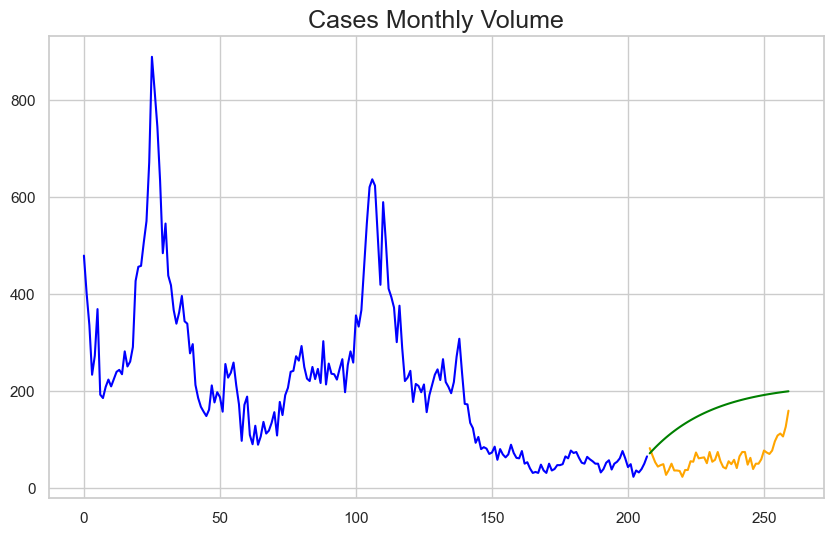

In [87]:
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data in blue.
plt.plot(train['number'], color = 'blue')

# Plot testing data in orange.
plt.plot(test['number'], color = 'orange')

# Plot predicted values in green.
plt.plot(preds, color = 'green')

plt.title(label = 'Cases Monthly Volume', fontsize=18)
plt.show();

In [88]:
# Getting right p,q,d

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

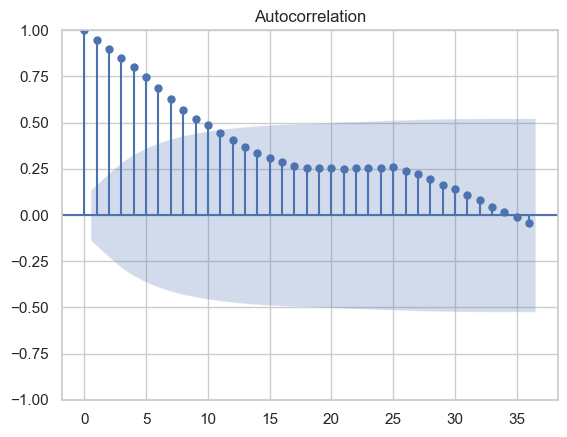

In [90]:
# Generate autocorrelation plot on training data.
plot_acf(train['number'], lags = 36);

# Note: we would generate the ACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

This is an AR model, given the gradual decline.

/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


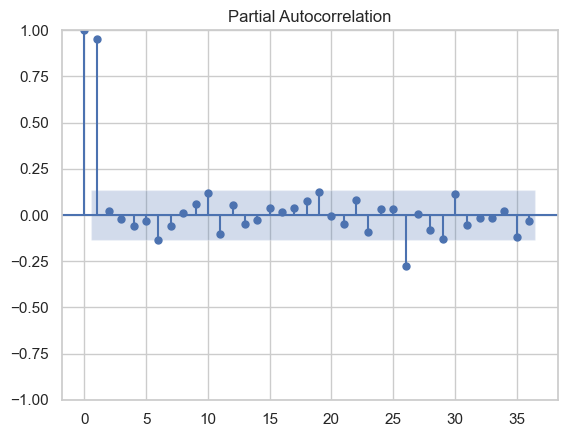

In [91]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['number'], lags = 36);

# Note: we would generate the PACF plot on 
# differenced data, if we needed to difference
# in order to achieve stationarity!

pACF is cut off at 2

We'll use an AR(2) model

Also an MA model given that the pACF tails off. 
Cut off is at lag 10 so we will do a MA(10) model.

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3982.6623617648575


/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


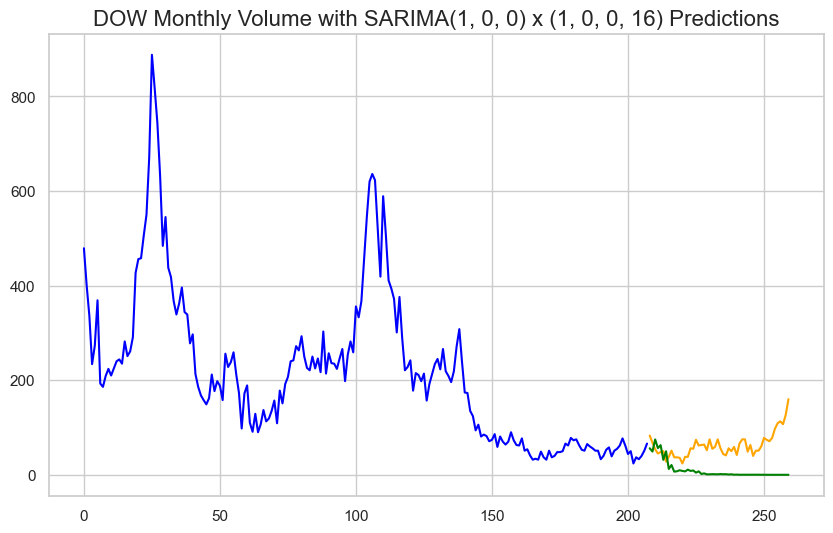

In [93]:
# Fit a SARIMA(1, 0, 0) x (1, 0, 0, 16) model.

sarima = SARIMAX(endog = train['number'],
                 order = (0, 0, 10),              # (p, d, q)
                 seasonal_order = (1, 0, 0, 12)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit(disp=False)

# Generate predictions based on test set.
preds = model.predict(start=208, end=259)

# Evaluate predictions.
print(mean_squared_error(test['number'], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['number'], color = 'blue')
plt.plot(test['number'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(1, 0, 0) x (1, 0, 0, 16) Predictions', fontsize=16)
plt.show();

/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28179D+00    |proj g|=  1.86454D-02


 This problem is unconstrained.



At iterate    5    f=  5.28044D+00    |proj g|=  2.85013D-02

At iterate   10    f=  5.26749D+00    |proj g|=  1.55933D-02

At iterate   15    f=  5.26663D+00    |proj g|=  2.43332D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   2.433D-05   5.267D+00
  F =   5.2666341947539248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
659.5083052288433


/Users/kh/Documents/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


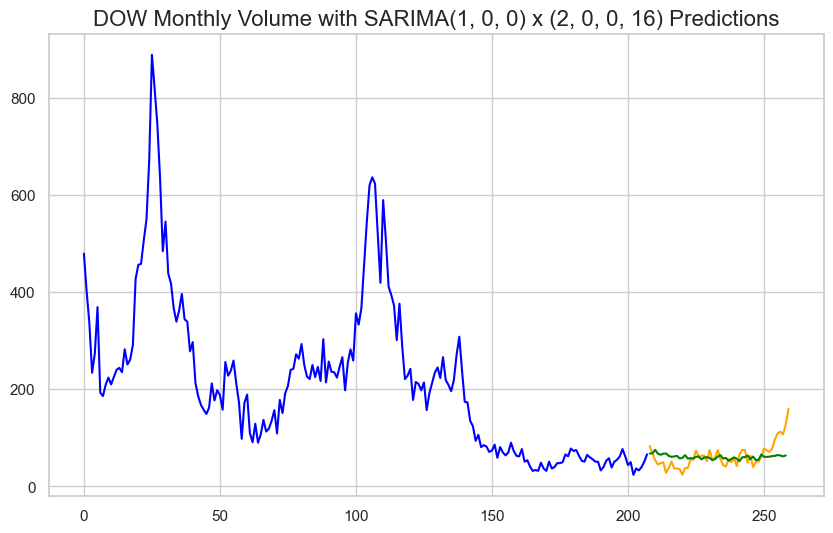

In [94]:
# Fit and visualize a SARIMAX(1, 0, 0) x (2, 0, 0, 16) model.

sarima = SARIMAX(endog = train['number'].iloc[1:],
                 order = (0, 1, 0),              # (p, d, q)
                 seasonal_order = (2, 0, 0, 12), # (P, D, Q, S)
                 exog = train[['mean_temp_lag_1','dengue_fever_lag_1']].iloc[1:])

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 150 and end at 186.
preds = model.predict(start=208, end=258, exog=test[['mean_temp_lag_1', 'dengue_fever_lag_1']])

# Evaluate predictions.
print(mean_squared_error(test['number'].iloc[1:], preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train['number'], color = 'blue')
plt.plot(test['number'], color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'DOW Monthly Volume with SARIMA(1, 0, 0) x (2, 0, 0, 16) Predictions', fontsize=16)
plt.show();